In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv('dog_rates_tweets.csv', parse_dates = True)


In [3]:
tweets

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...


In [4]:
extracted = tweets.text.str.extract(r'([0-9]{1,2}/10)', expand = False)

In [5]:
ratings = extracted.dropna()

In [6]:
ratings

2       14/10
7       13/10
8       14/10
24      13/10
30      13/10
        ...  
7363    14/10
7369    14/10
7381    13/10
7431    14/10
7433    13/10
Name: text, Length: 1675, dtype: object

In [7]:
ratings = ratings.str.replace('/10', '')

In [8]:
ratings

2       14
7       13
8       14
24      13
30      13
        ..
7363    14
7369    14
7381    13
7431    14
7433    13
Name: text, Length: 1675, dtype: object

In [9]:
ratings = pd.to_numeric(ratings)

In [10]:
ratings = ratings [ratings <= 25]

In [11]:
tweets['ratings'] = ratings

In [12]:
indexing = tweets.loc[ratings.index]

In [13]:
indexing['created_at'] = pd.to_datetime(indexing['created_at'])

In [14]:
indexing['ratings'] 

2       14.0
7       13.0
8       14.0
24      13.0
30      13.0
        ... 
7363    14.0
7369    14.0
7381    13.0
7431    14.0
7433    13.0
Name: ratings, Length: 1670, dtype: float64

In [17]:
def to_timestamp(datetime):
    return datetime.timestamp()
indexing['timestamp'] = indexing['created_at'].apply(to_timestamp)

In [18]:
indexing

,id,created_at,text,ratings,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09


In [19]:
from scipy import stats

In [20]:
linearRegression = stats.linregress(indexing['timestamp'], indexing['ratings'])

In [21]:
linearRegression.slope

3.542250450797093e-08

In [22]:
linearRegression.intercept

-40.844202279422205

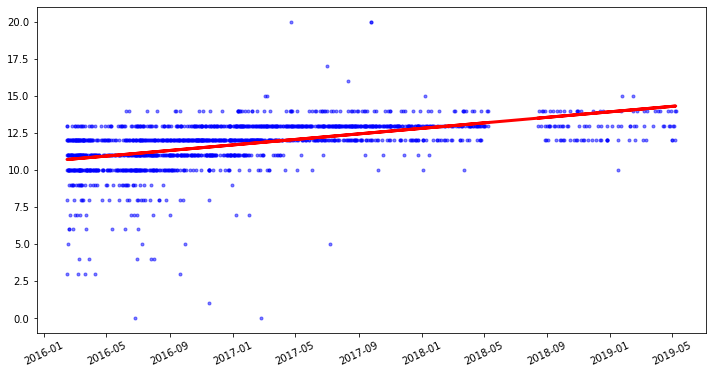

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xticks(rotation = 25)

plt.plot(indexing['created_at'], indexing['ratings'], 'b.', alpha = 0.5)
plt.plot(indexing['created_at'], indexing['timestamp']*linearRegression.slope + linearRegression.intercept, 'r-', linewidth=3)